In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

**Células para excluir na versão final:**  
Tutorial encontrado em: https://www.youtube.com/watch?v=ikt0sny_ImY&t=40s

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
y_exemplo=pd.DataFrame(iris.target)
y_exemplo.head(1)
iris.target; # formato: uma lista com todos os valores de "tipo de flor" (equivalente a animal_class)

In [3]:
iris_df; #no nosso trata-se do Dataframe com a exclusão da coluna de animal_name e class_type
iris_df.columns=["SL","SW","PL","PW"] # renomear colunas pois o df do sklearn n possui

In [4]:
y_exemplo; #no nosso dataframe(zoo), "target" é o equivalente a class_type, e portanto y será um DataFrame com 
   #a coluna class_type e somente a coluna class_type

In [5]:
X_exemplo=scale(iris.data)#Standardize a dataset along any axis; 
                  #Center to the mean and component wise scale to unit variance.
type(iris.data[0][0]);

In [6]:
clustering_exemplo = KMeans(n_clusters=3,random_state=6)#Nesse caso o n_clusters é 3 pois existem 
                                                #3 classificações para flores no nosso serão 7
KMmodelo   = clustering_exemplo.fit(X_exemplo)
color_theme = np.array(["darkgray","darkblue","red"])

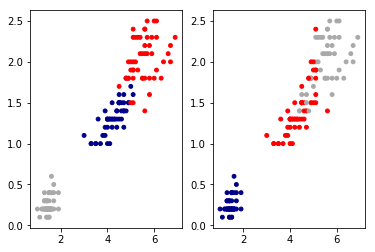

In [7]:
plt.subplot(1,2,1)
plt.scatter(iris_df.PL,iris_df.PW,c=color_theme[iris.target],s=15)
#s indica o tamanho da bolinha
plt.subplot(1,2,2)
plt.scatter(iris_df.PL,iris_df.PW,c=color_theme[clustering_exemplo.labels_],s=15)

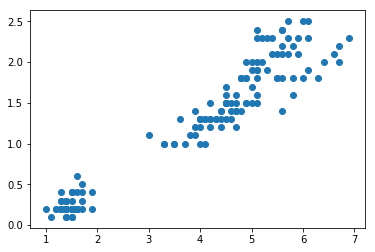

In [8]:
plt.scatter(iris_df.PL,iris_df.PW);

**Células pra manter na versão final:**

In [9]:
zoo = pd.read_csv(".\Data\zoo.csv")     #importando nosso dataset;
zoo = zoo.drop(columns="animal_name")   #eliminando animal_name, pois n influencia na classe 
                                        #e nem pode ser quantificado
y=pd.DataFrame(zoo.class_type)          #extrai class type real para teste de acuracia do nosso cluster
zoo = zoo.drop(columns="class_type")    #exclui class type da planilha avaliada evitando poluição de dados e erros

for column in list(zoo.columns):
    zoo[column] = zoo[column].astype(float)

In [10]:
zoo_array=np.array(zoo)

In [11]:
#verificação se zoo_array está certo:
zoo_dfver=pd.DataFrame(zoo_array)
zoo_dfver;

In [12]:
X=scale(zoo_array)
classe= np.array(y.class_type)

In [13]:
clustering = KMeans(n_clusters=7,random_state=14)
KMmodelo   = clustering.fit(X)
color_theme = np.array(["darkgray","darkblue","red","yellow","pink","magenta","gray"])

IndexError: index 7 is out of bounds for axis 1 with size 7

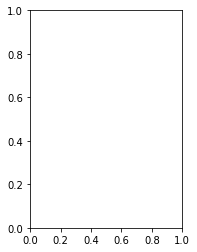

In [16]:
plt.subplot(1,2,1);
plt.scatter(zoo.hair,zoo.milk,c=color_theme[classe],s=15)
#s indica o tamanho da bolinha

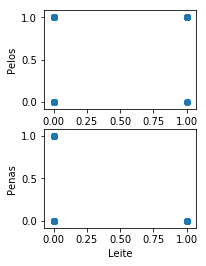

In [31]:
plt.subplot(2,2,1);
plt.scatter(zoo.milk,zoo.hair)
plt.xlabel("Leite")
plt.ylabel("Pelos")
plt.subplot(2,2,3);
plt.scatter(zoo.milk,zoo.feathers)
plt.xlabel("Leite")
plt.ylabel("Penas")
plt.show();

### Conclusão:
<p>É impossivel gerar scatter plots e portanto fazer clusterização dos dados de nosso data frame pois os nossos dados são em esmagadora maioria(1 exceção em 16) de ordem binária e portanto todos os nossos plots que não tenham o número de patas (a exceção quanto a ser binário) serão como o dos gráficos acima(ou triangulares ou quadrados).</p> 
<p>Esses gráficos basicamente dizem que existem 4 tipos de animais (os que possuem as características A e B, os que possuem apenas uma delas e os que não possuem nenhuma delas, a ausência do quarto ponto no segundo gráfico (Penas por Leite) nos diz que nenhum animal possui ao mesmo tempo penas e leite.</p>
 <p>O problema que impede a viabilidade do uso de cluster nesse caso é que o classificador considera que todos os animais que nem tem penas e nem amamentam como um mesmo grupo, mostrando como resultado que uma carpa pertence a mesma classe de um sapo pois eles não possuem penas e nem amamentam, no entato essa informação difere do que sabemos na realidade e dos dados coletados, que nos informam que sapos são anfíbios e carpas são peixes</p>